In [1]:
#6주 2강 : Provavility mass Function, cumulative Distrivution Function

## Probability Mass Function (PMF)

In [3]:
#항상 임포트 하는 칭구들
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
preg = pd.read_csv("./2002FemPreg.tsv", sep = "\t") #tsv파일 불러와서 preg에 담기
preg

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [5]:
!cd #현재 작업중인 파일의 위치 출력

C:\Users\HJW\확률및통계


In [6]:
live = preg[preg.outcome == 1] #살아서 태어난 아이만 포함

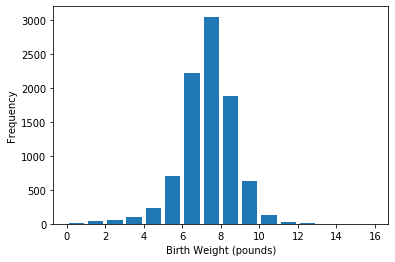

In [18]:
#탄생시 파운드 무게
plt.hist(live["birthwgt_lb"], rwidth = 0.8, label="birthwgt_lb", #살아서 태아난 아이의 몸무게로 히스토그램 생성
          bins = range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max() + 2))) #이미지의 범위는 최소값부터 맥스값의 +2!! (1아님)

plt.xlabel("Birth Weight (pounds)")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [20]:
# 히스토그램의 각 성분을 가지고 있는 딕셔너리 만들기
# 속도 측정시 가장 빨랐던 방식은 numpybincount

hist = {key : val for key, val in enumerate(np.bincount(live["birthwgt_lb"].dropna()))} #dropna : 빈 값 없애줌. 제외하고 사용하게 된다
#key와 val값을 live 안의 원소 개수만큼(빈 값은 제외하고) 반복함
# enumerate : 반복문 사용 시 몇번째 반복문인지 확인이 필요한 경우 사용.
# 인덱스 번호와 원소를 tuple 형태로 반환해준다.


In [21]:
#위의 문장을 실행시킨 결과 값
hist

{0: 8,
 1: 40,
 2: 53,
 3: 98,
 4: 229,
 5: 697,
 6: 2223,
 7: 3049,
 8: 1889,
 9: 623,
 10: 132,
 11: 26,
 12: 10,
 13: 3,
 14: 3,
 15: 1}

In [25]:
n = sum(hist.values()) #위의 값을 모두 더해준다
pmf = hist.copy() #hist를 카피하여 새로운 딕셔너리를 생성한다
for x, freq in hist.items(): #x가 hist안의 item들을 반복하며
    pmf[x] = freq / n #돌때마다 freq / 전체더한값으로 나누어준다.
    
# pmf : 확률변수에서 특정 값에 대한 확률을 나타내는 함수.
# 예를 들어, 주사위를 한 번 굴릴 때의 값을 나타내는 확률 변수가 X일 때, 
# 이 확률 변수에 대응되는 확률 질량 함수는 f_{X}(x)=1/6이다.

In [26]:
pmf

{0: 0.0008806693086745927,
 1: 0.004403346543372964,
 2: 0.005834434169969176,
 3: 0.01078819903126376,
 4: 0.025209158960810215,
 5: 0.07672831351827389,
 6: 0.24471598414795245,
 7: 0.3356450902686041,
 8: 0.2079480405107882,
 9: 0.06858212241303391,
 10: 0.01453104359313078,
 11: 0.0028621752531924264,
 12: 0.001100836635843241,
 13: 0.00033025099075297226,
 14: 0.00033025099075297226,
 15: 0.00011008366358432408}

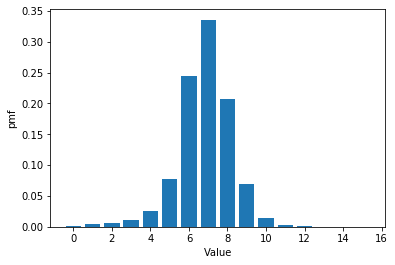

In [27]:
plt.bar(pmf.keys(), pmf.values()) #key가 x축, values가 y축 값
plt.xlabel("Value")
plt.ylabel("pmf")
plt.show()
plt.close()

# 히스토그램의 모양은 같으나, 값의 scale이 달라짐

In [28]:
print(sum(pmf.values()))
# 구한 pmf값을 모두 더하면 1이 된다. (확률이므로)

1.0


In [31]:
# pmf 직접 만들어보가
values = [1,2,2,3,5]
pmf = {key: val / len(values) for key, val in enumerate(np.bincount(values))} # 모든 샘플의 개수로 나누어준다.
pmf

# 샘플 list인 values에서 0이 나올 확률 0, 1이 나올 확률 20%, 2가 나올 확률 40%, 3이 나올 확률 20%, 4가 나올 확률 0, 5가 나올 확률 20%
# 모든 확률을 더하면 1.0 (100%)가 된다.

{0: 0.0, 1: 0.2, 2: 0.4, 3: 0.2, 4: 0.0, 5: 0.2}

In [32]:
# 샘플값에 없는 값을 결과에서 지우고 싶다면

pmf = {key: val / len(values) for key, val in enumerate(np.bincount(values)) if val != 0 }  #val이 0인 값은 제외하도록
pmf

#실제로 리스트 안에 들어있는 값만 나오게 된다.

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [33]:
pmf[2] #확률 값 조회하는 방법

0.4

In [40]:
pmf[2] += 0.2 #???
total = sum(pmf.values())
pmf = {key : val / total for key, val in pmf.items()} #노멀라이즈 진행
pmf

{1: 0.13888888888888887,
 2: 0.5833333333333333,
 3: 0.13888888888888887,
 5: 0.13888888888888887}

In [42]:
sum(pmf.values())
#컴퓨터가 계산하는 소수점은 미묘하게 다를 수 있다...
#더해서 1이 나오는게 맞음

0.9999999999999998

In [45]:
pmf[2] *= 2 #확률을 2배로 곱하면 ..

total = sum(pmf.values())
pmf = {key : val / total for key, val in pmf.items()} #노멀라이즈 진행
pmf

{1: 0.05050505050505051,
 2: 0.8484848484848486,
 3: 0.05050505050505051,
 5: 0.05050505050505051}

In [46]:
sum(pmf.values())

1.0000000000000002

In [47]:
pmf = {key: val / len(live["prglngth"]) for key, val in enumerate(np.bincount(live["prglngth"].dropna()))} 

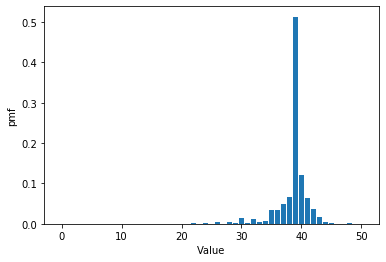

In [48]:
plt.bar(pmf.keys(), pmf.values()) #key가 x축, values가 y축 값
plt.xlabel("Value")
plt.ylabel("pmf")
plt.show()
plt.close()

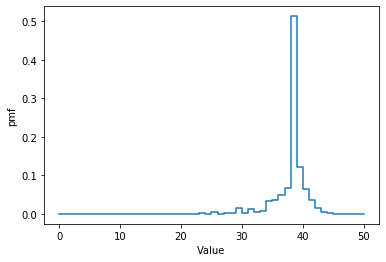

In [50]:
plt.step(list(pmf.keys()), list(pmf.values())) #list로 인자를 타입캐스팅하고 step을 사용하면 깔끔하게 출력됨
plt.xlabel("Value")
plt.ylabel("pmf")
plt.show()
plt.close()

In [51]:
firsts = live[live.birthord == 1] #첫번째 아이
others = live[live.birthord > 1] # 1이상의 아이, 둘째부터

first_pmf = {key: val / len(firsts["prglngth"]) for key, val in enumerate(np.bincount(firsts["prglngth"].dropna()))} #first의 pmf
others_pmf = {key: val / len(others["prglngth"]) for key, val in enumerate(np.bincount(others["prglngth"].dropna()))} 

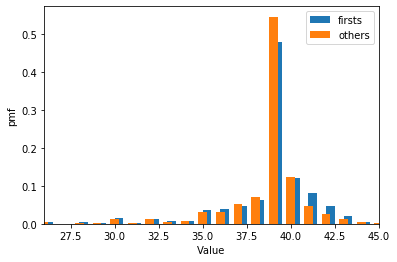

In [63]:
plt.bar(first_pmf.keys(), first_pmf.values(), width = 0.5, align = "edge", label = "firsts") #key가 x축, values가 y축 값
plt.bar(others_pmf.keys(), others_pmf.values(), width = 0.5, align = "center", label = "others")
plt.xlabel("Value")
plt.ylabel("pmf")
plt.xlim(26,45) #범위제한
plt.legend() #bar 정보
plt.show()
plt.close()

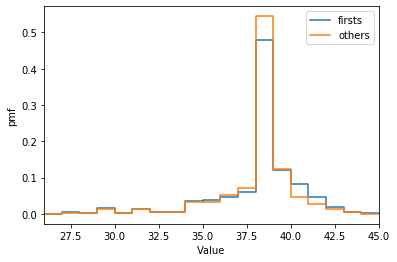

In [62]:
#범위가 넓어지고 히스토그램이 길어지면 구분하기 어려움 -> 이 때는 step이 보기 편하다.

plt.step(list(first_pmf.keys()), list(first_pmf.values()),label = "firsts") #key가 x축, values가 y축 값
plt.step(list(others_pmf.keys()), list(others_pmf.values()), label = "others")
plt.xlabel("Value")
plt.ylabel("pmf")
plt.xlim(26,45) #범위제한
plt.legend()
plt.show()
plt.close()

#평균 임신기간 중 가장 출산이 많은 주의 수는 first가 더 적은 것을 알 수 있다...

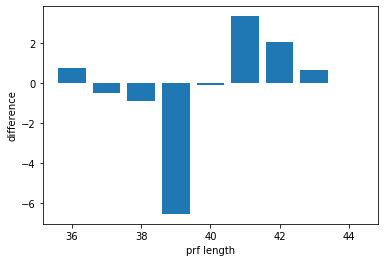

In [65]:
#두 확률이 얼마나 차이나는지 확인해보기 

weeks = range(36, 45) #36 ~ 44주만 집중해서 확인!
diffs =  [] #차이값을 기록할 빈 리스트
for week in weeks: #week 범위를 week 이터레이터가 반복함
    p1 = first_pmf[week]
    p2 = others_pmf[week] #first와 others의 week 확률 차이를 보고
    diff = 100 * (p1 - p2) #100을 곱하여 차이값 diff 변수에 넣어줌
    # p1(first)에 비해서 p2(other)가 얼마나 적은지!
    diffs.append(diff)
    
plt.bar(weeks, diffs) #위의 반복문으로 구한 값을 bar로 표현
plt.xlabel("prf length") #임신기간
plt.ylabel("difference") #확률 차이
plt.show()
plt.close()

#40주를 기점으로 오른편은 other가 더 확률이 높고, 왼편은 확률이 낮음

## Cumulative Distribution Function (CDF)

In [ ]:
# CDF
# 주어진 확률 변수가 특정 값보다 작거나 같은 확률을 나타내는 함수

In [66]:
live = preg[preg.outcome == 1] #살아서 태어난 아이의 데이터
firsts = live[live.birthord ==1 ] #첫번째로 태어난 아이의 데이터
others = live[live.birthord > 1] #첫번째 가 아닌 순서로 태어난 아이의 데이터

In [72]:
#무게 (연속임)
first_wgt_dropna = firsts.totalwgt_lb.dropna()
other_wgt_dropna = others.totalwgt_lb.dropna()

In [75]:
# 사이즈가 1이 아니게 , 조밀하게 히스토그램을 보고싶으면 numpy의 히스토그램 사용
# 카운트 된 값은 첫번째에 리턴되고, 두번째가 bin 값 리턴됨
# bins에는 리스트를 넣을 수도 있고, 숫자를 넣을 수도 있다.
first_hist, first_bins = np.histogram(first_wgt_dropna, bins=100) #100을 넣으면 전체 데이터를 100개로 쪼개서 리턴함
first_bins

array([ 0.125   ,  0.278125,  0.43125 ,  0.584375,  0.7375  ,  0.890625,
        1.04375 ,  1.196875,  1.35    ,  1.503125,  1.65625 ,  1.809375,
        1.9625  ,  2.115625,  2.26875 ,  2.421875,  2.575   ,  2.728125,
        2.88125 ,  3.034375,  3.1875  ,  3.340625,  3.49375 ,  3.646875,
        3.8     ,  3.953125,  4.10625 ,  4.259375,  4.4125  ,  4.565625,
        4.71875 ,  4.871875,  5.025   ,  5.178125,  5.33125 ,  5.484375,
        5.6375  ,  5.790625,  5.94375 ,  6.096875,  6.25    ,  6.403125,
        6.55625 ,  6.709375,  6.8625  ,  7.015625,  7.16875 ,  7.321875,
        7.475   ,  7.628125,  7.78125 ,  7.934375,  8.0875  ,  8.240625,
        8.39375 ,  8.546875,  8.7     ,  8.853125,  9.00625 ,  9.159375,
        9.3125  ,  9.465625,  9.61875 ,  9.771875,  9.925   , 10.078125,
       10.23125 , 10.384375, 10.5375  , 10.690625, 10.84375 , 10.996875,
       11.15    , 11.303125, 11.45625 , 11.609375, 11.7625  , 11.915625,
       12.06875 , 12.221875, 12.375   , 12.528125, 

In [76]:
len(first_bins) #업퍼, 로워때문에 101개로 나옴.

101

In [79]:
np.arange(0, 16,0.05) #0부터 시작해서 0.05단위로 키워가며 리스트를 생성한다

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

In [82]:
#범위를 주는 방식

first_hist, first_bins = np.histogram(first_wgt_dropna, bins=np.arange(0, 16,0.05)) #0에서부터 16까지 0.05단위로 쪼개서 리턴
other_hist, other_bins = np.histogram(other_wgt_dropna, bins=np.arange(0, 16,0.05))

#pmf 만들기
first_pmf = {key : val / len(first_wgt_dropna) for key, val in zip(first_bins, first_hist) } #zip으로 묶기
other_pmf = {key : val / len(other_wgt_dropna) for key, val in zip(other_bins, other_hist) }

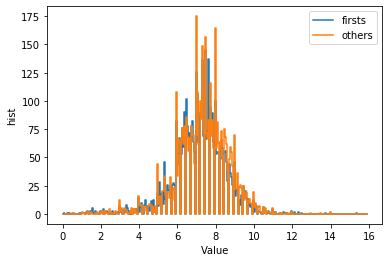

In [83]:
plt.step(first_bins[:-1], first_hist, label = "firsts")
plt.step(other_bins[:-1], other_hist, label = "others")
plt.xlabel("Value")
plt.ylabel("hist")
plt.legend()
plt.show()
plt.close()

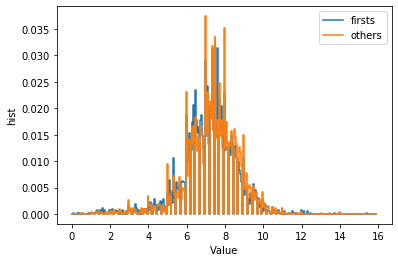

In [85]:
#pmf
plt.step(list(first_pmf.keys()), list(first_pmf.values()), label = "firsts")
plt.step(list(other_pmf.keys()), list(other_pmf.values()), label = "others")
plt.xlabel("Value")
plt.ylabel("hist")
plt.legend()
plt.show()
plt.close()

#히스토그램을 쪼개다보면 눈으로 비교하기 어려울 수 있다...

In [106]:
# 하위 몇 %인지 알아보기
# 순위를 따졌을때 아래에서부터 몇퍼센트 위에 있는지 알 수 있다.

def percentileRank(scores, your_score) :
    count = 0
    for score in scores: #score중에서
        if score <= your_score: #우리가 원하는 타겟 스코어보다 작은 값들을 모두 세서
            count += 1
    percentile_rank = 100 * count / len(scores) #퍼센트 랭크를 만들어주고
    return percentile_rank #리턴
    
    

In [107]:
test = [55,66,77,88,99]
percentileRank(test, 88) #순위를 매길 리스트를 인자로 주고, 순위를 확인할 값을 인자로 넣어주면
# 88이 5개 중 4번째 이므로 하위 80%인 것을 알 수 있다.

80.0

In [114]:
#반대로 랭크를 주면 해당 값을 리턴하도록 만들어보기

def  Percentile(scores, percentile_rank):
    for score in sorted(scores): #입력받은 리스트를 정렬된 상태로 만들고 그 안을 반복해 돌며
        if percentileRank(scores, score) >= percentile_rank: #하위 몇%인지 뱉어내는 함수를 사용하여 리턴되는 퍼센트가  percentile_rank보다 크거나 같으면 리턴함
            return score
        
Percentile(test, 45)

#상위 45퍼센트에 해당되는 값을 리턴해준다. (sort한 상태라 상위로 변경)
#정렬도 하고 여러가지로 느린 함수임.

77

In [115]:
#좀 더 빠르게 만들어보면?
def percentile2(scores, percentile_rank):
    scores.sort() #정렬 후
    index = percentile_rank * (len(scores)-1) //100
    #pecentile_rank가 균질한 값으로 있기 때문에 랭크값을 알면 인덱스를 바로 구할 수 있다.
    return scores[index]

percentile2(test, 45)
#작동이 달라서 결과값이 다른데.. 두개 다 맞는 값이라고 한다..

66

In [137]:
#CDF : 0~1까지
#퍼센타일 : 0~100
# -> 만드는 방식이 똑같다.

def evalCDF(sample, x) : #x가 내가 확인하길 원하는 값
    count = 0.0 #0~1까지이므로 실수값으로 설정한다
    for value in sorted(sample): #샘플 값을 정렬하여 내가 원하는 값보다 작은것 부터 확인한다.
        if value <= x:
            count += 1
    prob = count / len(sample)   #count를 샘플의 갯수만큼 나누어주면
    return prob

#퍼센타일 구하는 방식과 같이 CDF를 구할 수 있다.  

def  getValCdf(scores, cdf_vlaue):
    for score in sorted(sample): #입력받은 리스트를 정렬된 상태로 만들고 그 안을 반복해 돌며
        if evalCDF(sample, score) >= cdf_vlaue: #하위 몇%인지 뱉어내는 함수를 사용하여 리턴되는 퍼센트가  percentile_rank보다 크거나 같으면 리턴함
            return score


def evaCdfCdf(cdf, target_val): #cdf 딕셔너리를 만들어서 구하기
    for val, score in sorted(cdf.items()): #cdf였던 값을 가지고
        if val >= target_val: #원하는 타겟 파일보다 커질때 리턴 (이미 정렬되어있음)
            return score
            
def getValCdfCdf(cdf, cdf_value): 
    for val, score in sorted(cdf.items): #cdf 딕셔너리는 val score로 되어있을 것이다.  (어떤 값의 cdf 스코어)
        if score >= cdf_value:
            return val
     


In [138]:
#위의 함수를 통해 cdf 단위 구할 수 있음

t = [1,2,2,3,5]
print(evalCDF(t, 2))

0.6


In [144]:
# CDF(x) -> x보다 작은 값들의 pmf 합

def pmf2cdf(pmf_dict):
    cdf_dict = {}
    now = 0.0 #처음 CDF값은 0으로 시작하니까 0.0으로 지정
    for k, v in sorted(pmf_dict.items()) :  #정렬한 값을 키값으로 이터레이션 돌고
        now += v
        cdf_dict[k] = now
    return cdf_dict

In [145]:
first_hist, first_bins = np.histogram(first_wgt_dropna, bins=np.arange(0, 16,0.05)) #0에서부터 16까지 0.05단위로 쪼개서 리턴
other_hist, other_bins = np.histogram(other_wgt_dropna, bins=np.arange(0, 16,0.05))

live_wgt_dropna = live.totalwgt_lb.dropna()
live_hist, live_bins = np.histogram(live_wgt_dropna, bins = np.arange(0, 16, 0.05))

#pmf 만들기
first_pmf = {key : val / len(first_wgt_dropna) for key, val in zip(first_bins, first_hist) } #zip으로 묶기
other_pmf = {key : val / len(other_wgt_dropna) for key, val in zip(other_bins, other_hist) }
live_pmf = {key : val / len(live_wgt_dropna) for key, val in zip(live_bins, live_hist) }

first_cdf = pmf2cdf(first_pmf)
other_cdf = pmf2cdf(other_pmf)
live_cdf = pmf2cdf(live_pmf)

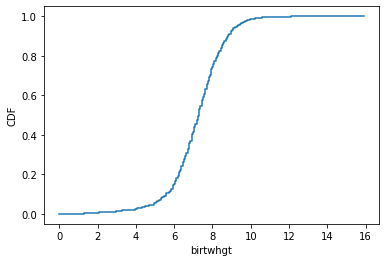

In [146]:
plt.step(list(live_cdf.keys()), list(live_cdf.values()))
plt.xlabel("birtwhgt")
plt.ylabel("CDF")
plt.show()
plt.close()

#0부터 시작하는 CDF 함수를 구할 수 있다.
#pmf보다 더 명확히 볼 수 있음

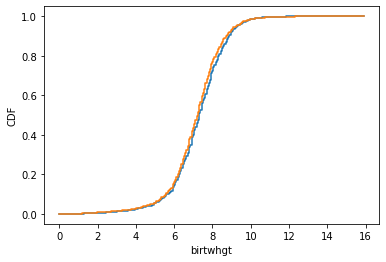

In [147]:
plt.step(list(other_cdf.keys()), list(other_cdf.values()), label = "others")
plt.step(list(first_cdf.keys()), list(first_cdf.values()), label = "firsts")
plt.xlabel("birtwhgt")
plt.ylabel("CDF")
plt.show()
plt.close()

#차이가 잘 보인다~

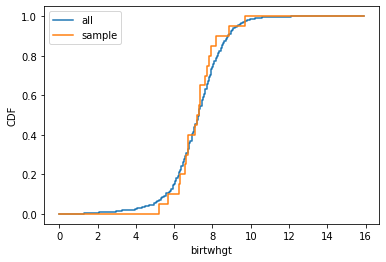

In [155]:
#np.choice : 전체의 일부를 샘플화?

#복원추출, 같은거 두번 이상 뽑을 수 있음
sample = np.random.choice(live_wgt_dropna, 20, replace=True)
sample_hist, sample_bins = np.histogram(sample, bins=np.arange(0, 16,0.05))
sample_pmf = {key: val/len(sample)
             for key, val in zip(sample_bins, sample_hist)}
sample_cdf = pmf2cdf(sample_pmf)

plt.step(list(live_cdf.keys()), list(live_cdf.values()), label = "all")
plt.step(list(sample_cdf.keys()), list(sample_cdf.values()), label = "sample")
plt.xlabel("birtwhgt")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

#전체 중에서 20개의 샘플을 뽑아서 만드는 것임

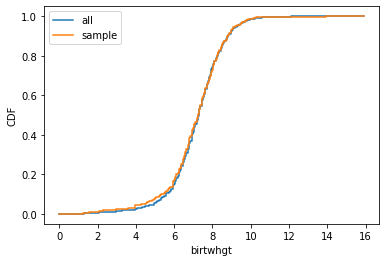

In [158]:
sample = np.random.choice(live_wgt_dropna, 1000, replace=True)
sample_hist, sample_bins = np.histogram(sample, bins=np.arange(0, 16,0.05))
sample_pmf = {key: val/len(sample)
             for key, val in zip(sample_bins, sample_hist)}
sample_cdf = pmf2cdf(sample_pmf)

plt.step(list(live_cdf.keys()), list(live_cdf.values()), label = "all")
plt.step(list(sample_cdf.keys()), list(sample_cdf.values()), label = "sample")
plt.xlabel("birtwhgt")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

#개수를 늘릴수록 함수가 비슷해진다
#얼마나 많이 쪼개야하는지는 bins 사이즈와 전체 샘플의 수와 관련이 있다... < 중간고사..!?!?!?!?

## Pandas indexing

In [162]:
array = np.random.randn(4,2) #넘파이의 2d 어레이가 랜덤값으로 리턴된다.
df = pd.DataFrame(array)

In [163]:
print(array)

#세로가 칼럼, 가로가 로우, 데이터프레임 생성!

[[ 0.52613387 -0.12138226]
 [ 0.39190227  0.82659689]
 [-0.04238848 -0.11223772]
 [-0.59862914  0.63704169]]


In [165]:
#칼럼 이름 정하기 가능
columns = ["A", "B"]
df = pd.DataFrame(array, columns = columns)
df

,A,B
0,0.526134,-0.121382
1,0.391902,0.826597
2,-0.042388,-0.112238
3,-0.598629,0.637042


In [166]:
columns = ["A", "B"]
index = ["a", "b", "c", "d"]
df = pd.DataFrame(array, columns = columns, index= index)
df

,A,B
a,0.526134,-0.121382
b,0.391902,0.826597
c,-0.042388,-0.112238
d,-0.598629,0.637042


In [167]:
df["A"] #일반적으로 딕셔너리는 칼럼을 조회하는 형태이다. A칼럼을 조회한 값이나옴

a    0.526134
b    0.391902
c   -0.042388
d   -0.598629
Name: A, dtype: float64

In [168]:
df.loc["a"] #low를 조회하고 싶다면 loc 사용

A    0.526134
B   -0.121382
Name: a, dtype: float64

In [170]:
df.iloc[0] #low 라벨 이름을 모르고 첫번째 값을 보고 싶다면 0을 입력하고 iloc 사용

A    0.526134
B   -0.121382
Name: a, dtype: float64

In [171]:
df.loc[["a","c"]] #여러개 고를 수 있고

,A,B
a,0.526134,-0.121382
c,-0.042388,-0.112238


In [174]:
df["a":"c"] #슬라이싱하여 선택도 가능 (인덱스 조회됨.. 칼럼이랑 헷갈리지 말기)

,A,B
a,0.526134,-0.121382
b,0.391902,0.826597
c,-0.042388,-0.112238


In [176]:
df[0:2] #주의 : 0에서 시작해서 2 이전, 즉 1까지 나오는 것이다

,A,B
a,0.526134,-0.121382
b,0.391902,0.826597
